<a href="https://colab.research.google.com/github/annchirackal/Tensorflow-Developer-Certification/blob/TF_certification_practice_CNN/11_CNN_Computer_Vision_Multiclass_Classtification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The intension of this notebook is to do muticlass classification for images.
Our data consistes image of different food itens and we are going to bulid a model which can identify each of the food items

In [144]:
from tensorflow.keras import layers,optimizers
import os
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
import random
import matplotlib.pyplot as plt

import zipfile

In [145]:
### assigning variable values
image_height=224
image_width=224
color_channel=3
batch_size=34

In [146]:
# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-01-18 04:20:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 173.194.195.207, 173.194.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  99.2MB/s    in 7.4s    

2024-01-18 04:21:07 (66.8 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [147]:
###  unzip the data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()



Let's walk through the directores and understand the directory structure.

In [148]:
for root, dirs, files in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirs)} directores and {len(files)} images in {root} ")

There are 2 directores and 0 images in 10_food_classes_all_data 
There are 10 directores and 0 images in 10_food_classes_all_data/test 
There are 0 directores and 250 images in 10_food_classes_all_data/test/hamburger 
There are 0 directores and 250 images in 10_food_classes_all_data/test/ramen 
There are 0 directores and 250 images in 10_food_classes_all_data/test/chicken_curry 
There are 0 directores and 250 images in 10_food_classes_all_data/test/sushi 
There are 0 directores and 250 images in 10_food_classes_all_data/test/pizza 
There are 0 directores and 250 images in 10_food_classes_all_data/test/steak 
There are 0 directores and 250 images in 10_food_classes_all_data/test/grilled_salmon 
There are 0 directores and 250 images in 10_food_classes_all_data/test/fried_rice 
There are 0 directores and 250 images in 10_food_classes_all_data/test/ice_cream 
There are 0 directores and 250 images in 10_food_classes_all_data/test/chicken_wings 
There are 10 directores and 0 images in 10_foo

So, we have 10 image classes and we have 750 training images and 250 test images in each  classes

In [149]:
#Set the tran and test data path
test_path="10_food_classes_all_data/test"
train_path="10_food_classes_all_data/train"

In [150]:
train_data=image_dataset_from_directory(
    train_path,
  image_size=(image_height, image_width),
     label_mode='categorical',
  batch_size=batch_size)

validation_data=image_dataset_from_directory(
    test_path,
  image_size=(image_height, image_width),
     label_mode='categorical',
  batch_size=32)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [151]:
class_names=train_data.class_names

(224, 224, 3)


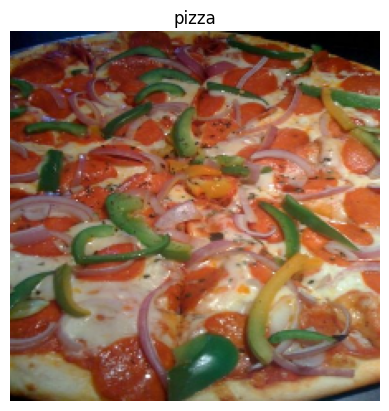

In [152]:
# Lets plot some of the images and understand the data

random_number=random.randint(0,31) # set a random number between 0 and 31 as our bach size is 32
for images,labels in  train_data.take(1): # train_data.take(1) brings back one batch from the train_data
  print(images[random_number].shape)
  plt.imshow(tf.cast(images[random_number],tf.int32))
  plt.title(train_data.class_names[labels[random_number].numpy().argmax()])
  plt.axis("off")

Now we have a clear idea about the data set.
- we have images of food from 10 different classes
- each class has 750 train images and 250 test images
- we have plotted few images to understand the images.<br>

Now we are good to build the model.

In [153]:
train_data=train_data.map(lambda x, y: (tf.cast(x, tf.int32), y))
validation_data=validation_data.map(lambda x, y: (tf.cast(x, tf.int32), y))

In [154]:
### Model - 1
### First model without any data augmentation
model_1= tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters=10,kernel_size=3,strides=1,activation="relu",input_shape=(image_height,image_width,color_channel)),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(10,3,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(10,3,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')

])
model_1.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])


In [156]:
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=validation_data,validation_steps=len(validation_data))

Epoch 1/5
221/221 [==============================] - 24s 99ms/step - loss: 1.2747 - accuracy: 0.5653 - val_loss: 1.9320 - val_accuracy: 0.3772
Epoch 2/5
221/221 [==============================] - 22s 97ms/step - loss: 1.0849 - accuracy: 0.6388 - val_loss: 2.1109 - val_accuracy: 0.3524
Epoch 3/5
221/221 [==============================] - 22s 98ms/step - loss: 0.8810 - accuracy: 0.7131 - val_loss: 2.3887 - val_accuracy: 0.3384
Epoch 4/5
221/221 [==============================] - 21s 95ms/step - loss: 0.6837 - accuracy: 0.7768 - val_loss: 2.8173 - val_accuracy: 0.3276
Epoch 5/5
221/221 [==============================] - 26s 117ms/step - loss: 0.4991 - accuracy: 0.8396 - val_loss: 3.3610 - val_accuracy: 0.3040


In [157]:
import pandas as pd
## lets plot validation and training curves seperately
def plot_losses(history):
  '''
  return seperate curves plotted for training and validation matrix
  '''
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs,val_loss,label="validation loss")
  plt.title("Loss Curve ")
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()

  #Plot accuracy
  plt.figure
  plt.plot(epochs,accuracy,label="training accuracy")
  plt.plot(epochs,val_accuracy,label="validation accuracy")
  plt.title("Accuracy Curve ")
  plt.ylabel("acuuracy")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()





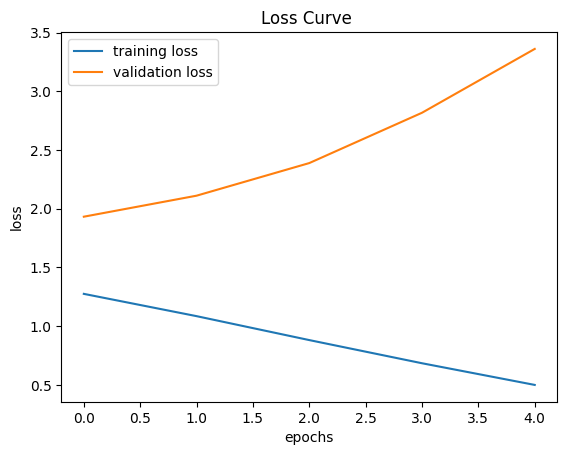

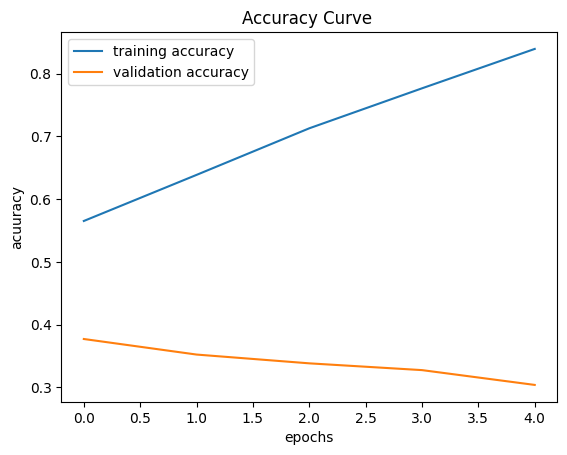

In [158]:
plot_losses(history_1)

-Training accuracy is increasing and accuracy is not increasing same manner. This is clear case of overfitting. <br>

Lets fine tune the model.

In [159]:
model_2= tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(filters=64,kernel_size=3,strides=1,activation="relu",input_shape=(image_height,image_width,color_channel)),
    layers.MaxPool2D(pool_size=2,padding="valid"),
     layers.Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(10,3,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(14,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')

])
model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [160]:
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=validation_data,validation_steps=len(validation_data))

Epoch 1/5
221/221 [==============================] - 27s 110ms/step - loss: 2.2620 - accuracy: 0.1355 - val_loss: 2.1996 - val_accuracy: 0.1524
Epoch 2/5
221/221 [==============================] - 24s 107ms/step - loss: 2.1567 - accuracy: 0.1937 - val_loss: 2.1051 - val_accuracy: 0.2152
Epoch 3/5
221/221 [==============================] - 24s 107ms/step - loss: 2.0970 - accuracy: 0.2307 - val_loss: 2.0583 - val_accuracy: 0.2472
Epoch 4/5
221/221 [==============================] - 23s 105ms/step - loss: 2.0393 - accuracy: 0.2581 - val_loss: 1.9788 - val_accuracy: 0.2720
Epoch 5/5
221/221 [==============================] - 25s 110ms/step - loss: 1.9946 - accuracy: 0.2788 - val_loss: 1.9440 - val_accuracy: 0.2864


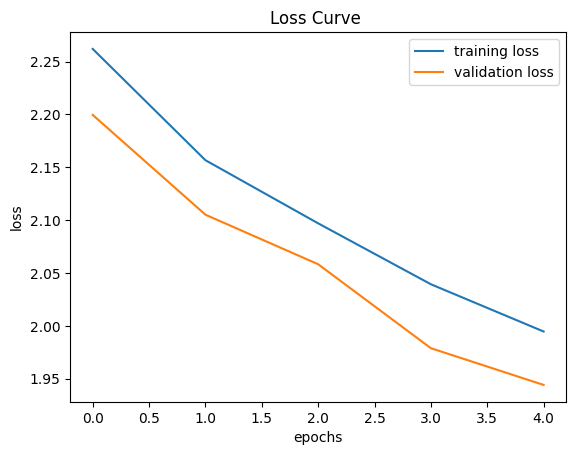

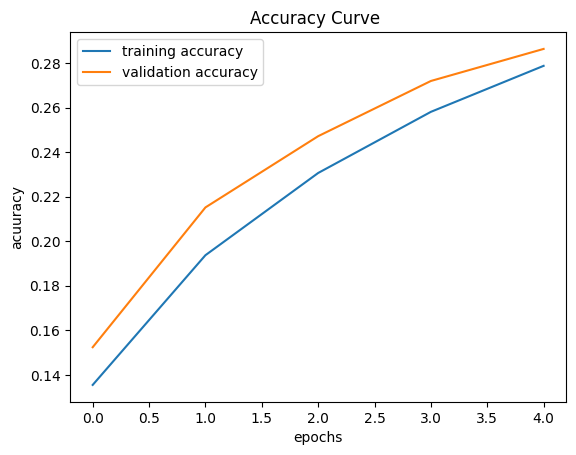

In [161]:
plot_losses(history_2)

Before we add agumentation let's see the how the augmented image will look

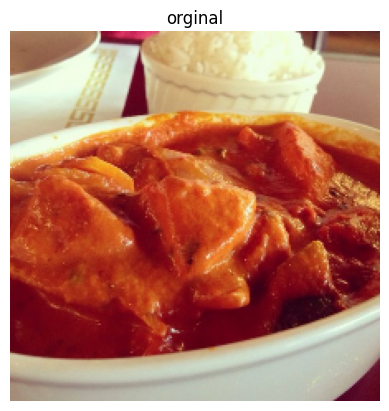

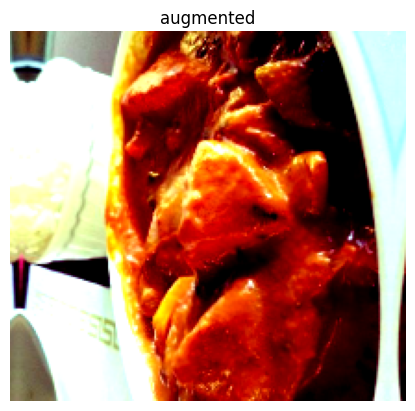

In [162]:
data_augmentation = tf.keras.Sequential(
    [
    layers.Rescaling(1./255),
    layers.RandomCrop(200,214),
    layers.RandomFlip(mode="horizontal_and_vertical"),
     layers.RandomRotation(factor=(-0.3,.3),fill_mode='reflect',interpolation='bilinear',fill_value=0.0),
    layers.RandomContrast(factor=[0,1.5],),
    ]
)

random_number=random.randint(0,31) # set a random number between 0 and 31 as our bach size is 32
for images,labels in  train_data.take(1): # train_data.take(1) brings back one batch from the train_data

  plt.imshow(images[random_number])
  plt.title("orginal")
  plt.axis("off")
  plt.show()
  plt.imshow(data_augmentation(images[random_number]))
  plt.title("augmented")
  plt.axis("off")

In [163]:
### Adding data Augmnetation
model_3= tf.keras.Sequential([
   layers.Rescaling(1./255),
    layers.RandomCrop(200,214),
    layers.RandomFlip(mode="horizontal_and_vertical"),
     layers.RandomRotation(factor=(-0.3,.3),fill_mode='reflect',interpolation='bilinear',fill_value=0.0),
    layers.RandomContrast(factor=[0,1.5],),
    layers.Conv2D(filters=32,kernel_size=3,strides=1,activation="relu",input_shape=(image_height,image_width,color_channel)),

    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(16,3,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(10,3,activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax')

])

model_3.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [164]:
history_3=model_3.fit(train_data,epochs=50,steps_per_epoch=len(train_data),validation_data=validation_data,validation_steps=len(validation_data))

Epoch 1/50
221/221 [==============================] - 32s 130ms/step - loss: 2.2253 - accuracy: 0.1663 - val_loss: 2.1565 - val_accuracy: 0.2320
Epoch 2/50
221/221 [==============================] - 26s 115ms/step - loss: 2.0676 - accuracy: 0.2552 - val_loss: 2.0461 - val_accuracy: 0.2504
Epoch 3/50
221/221 [==============================] - 27s 122ms/step - loss: 1.9780 - accuracy: 0.3056 - val_loss: 1.9604 - val_accuracy: 0.3008
Epoch 4/50
221/221 [==============================] - 25s 112ms/step - loss: 1.9209 - accuracy: 0.3289 - val_loss: 2.0122 - val_accuracy: 0.2632
Epoch 5/50
221/221 [==============================] - 26s 113ms/step - loss: 1.8836 - accuracy: 0.3491 - val_loss: 1.9924 - val_accuracy: 0.2740
Epoch 6/50
221/221 [==============================] - 25s 111ms/step - loss: 1.8347 - accuracy: 0.3684 - val_loss: 1.8938 - val_accuracy: 0.3152
Epoch 7/50
221/221 [==============================] - 26s 115ms/step - loss: 1.8187 - accuracy: 0.3796 - val_loss: 1.8367 - val_ac

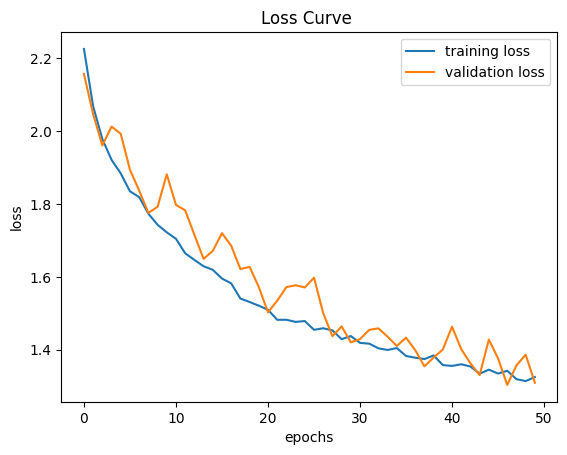

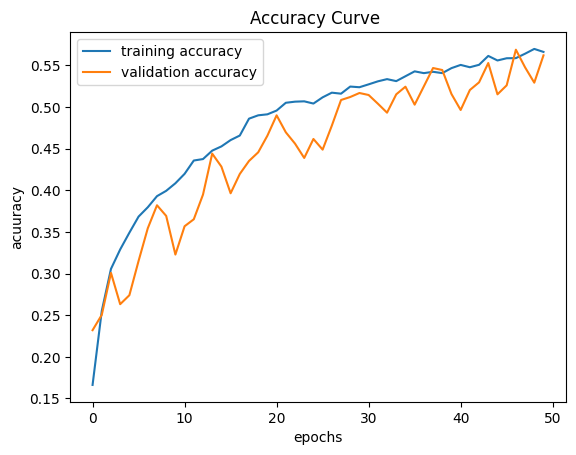

In [165]:
plot_losses(history_3)

We could see as the epoch increases accuracy increases in both traing and validation. Lets save our data set.

In [166]:
#save the final model
model_3.save("Food_vision_model")

In [167]:
# Load in a model and evaluate it
loaded_food_vison_model= tf.keras.models.load_model("Food_vision_model")


In [168]:
# Lets load 4 images in from git and do prediction on loaded model

# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


In [169]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [image_height, image_width])
  img=tf.cast(img,dtype=tf.int32)

  plt.imshow(img)
  plt.show()
  img=tf.expand_dims(img, axis=0) # add an extra dimension at axis 0
  return img

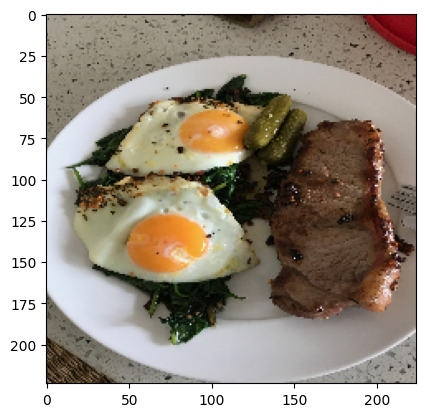

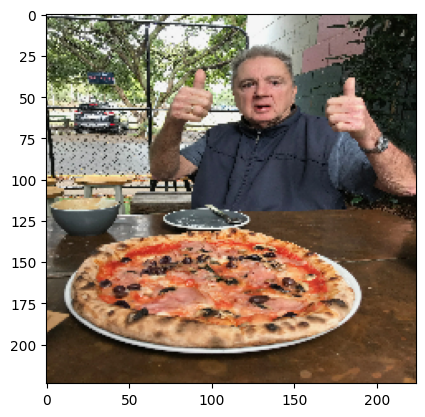

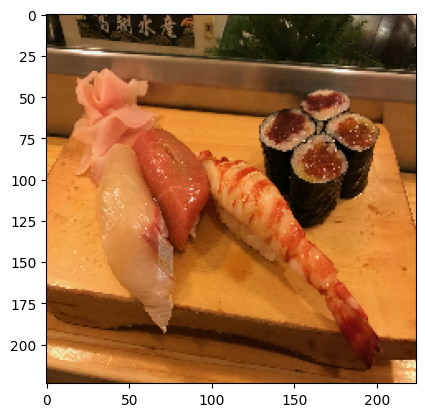

In [170]:
steak = load_and_prep_image("/content/03-steak.jpeg")
pizza = load_and_prep_image("03-pizza-dad.jpeg")
sushi = load_and_prep_image("03-sushi.jpeg")

In [171]:
loaded_food_vison_model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_48 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 random_crop_43 (RandomCrop  (None, 200, 214, 3)       0         
 )                                                               
                                                                 
 random_flip_37 (RandomFlip  (None, 200, 214, 3)       0         
 )                                                               
                                                                 
 random_rotation_40 (Random  (None, 200, 214, 3)       0         
 Rotation)                                                       
                                                                 
 random_contrast_37 (Random  (None, 200, 214, 3)       0         
 Contrast)                                           

In [172]:
def predict_from_loaded_model(model,img,class_names):
  predict=model.predict(img)
  predicted_class=class_names[predict.argmax()]
  print(predicted_class)

In [173]:
predict_from_loaded_model(loaded_food_vison_model,pizza,class_names)

1/1 [==============================] - 0s 267ms/step
sushi


In [176]:
predict_from_loaded_model(loaded_food_vison_model,pizza,class_names)

1/1 [==============================] - 0s 69ms/step
sushi
